In [110]:
import os
import pandas as pd

In [111]:
os.getcwd()

'/home/silas/MIDS/W251/hw9'

In [112]:
os.chdir('/home/silas/MIDS/W251/hw9/')

In [113]:
!ls

all_data.zip		 eval_loss (2) 30k.svg	learning_rate_100_step.svg
best_models		 eval_loss.svg		learning_rate_100_wall.svg
docs			 gpu_performance.txt	nohup.out
Eval_BLEU_Score_100.svg  HW9			seq2seq
Eval_BLEU_Score_30k.svg  jumpa_dmon.csv		train_loss_100_relative.svg
Eval_BLEU_Score.svg	 jumpa_dmon_sep.csv	train_loss_100_wall.svg
eval_loss_100.svg	 jumpa_dmon_sep.xls	train_loss.svg
eval_loss (1).svg	 jumpa_history


In [115]:
df = pd.read_csv('jumpa_dmon_sep.csv', sep='\s+', na_values=['.']).reset_index()

In [116]:
df['id']=list(range(df.shape[0]))

In [117]:
df=df.set_index('id')

In [118]:
df.head()

,index,#,gpu,pwrgtemp,mtemp,sm,mem,enc,dec,mclk,pclk
id,,,,,,,,,,,
0,#,Idx,W,C,C,%,%,%,%,MHz,MHz
1,0,170,53,-,100,31,0,0,715,1328,NaN
2,1,154,57,-,100,36,0,0,715,1328,NaN
3,0,42,51,-,100,0,0,0,715,1328,NaN
4,1,42,55,-,100,0,0,0,715,1328,NaN


In [119]:
df.columns

Index(['index', '#', 'gpu', 'pwrgtemp', 'mtemp', 'sm', 'mem', 'enc', 'dec',
       'mclk', 'pclk'],
      dtype='object')

In [120]:
df=df[['index', '#', 'gpu', 'mtemp', 'sm']]

In [121]:
df.columns=['gpu', 'pwrgtemp', 'mtemp','sm','mem']

In [122]:
df=df[~df.gpu.str.contains("#")]

In [123]:
df0=df[df.gpu=='0'].apply(pd.to_numeric)

In [124]:
df1=df[df.gpu=='1'].apply(pd.to_numeric)

In [125]:
df0.head()

,gpu,pwrgtemp,mtemp,sm,mem
id,,,,,
1,0,170,53,100,31
3,0,42,51,100,0
5,0,43,52,100,26
7,0,42,50,100,0
9,0,43,51,100,1


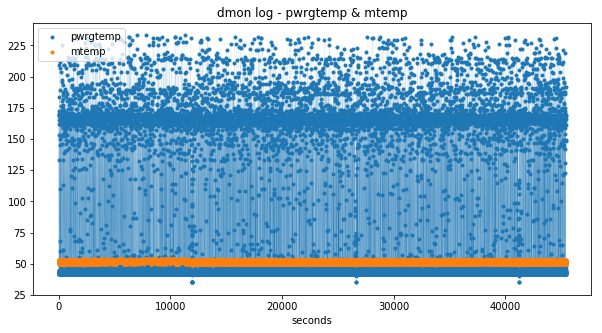

In [127]:
title='dmon log - pwrgtemp & mtemp'
ax = df0[['pwrgtemp','mtemp']].plot(figsize=(10,5), marker='.', lw=.05, title=title)
ax.set_xlabel("seconds")
fig = ax.get_figure()
fig.savefig('figure-{}.png'.format(title))

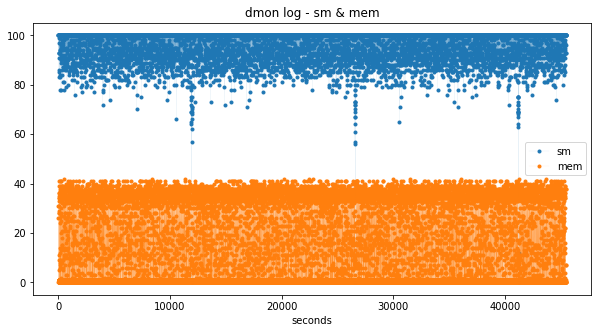

In [128]:
title='dmon log - sm & mem'
ax = df0[['sm','mem']].plot(figsize=(10,5), marker='.', lw=.05, title=title)
ax.set_xlabel("seconds")
fig = ax.get_figure()
fig.savefig('figure-{}.png'.format(title))